error_L2  = 0.013681172433920051
error_L2_stone_age  = 0.0136811724339
error_max = 1.7763568394e-15


NameError: name 'plt' is not defined

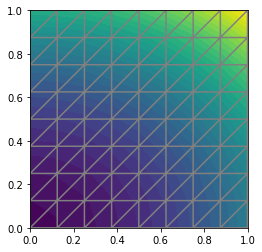

In [1]:
from fenics import *
import numpy as np
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, "P", 1)
# Define boundary condition
u_D = Expression('1 + 2*x[0]*x[0] + 3*x[1]*x[1]', degree=2)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-10.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx
# Compute solution
u = Function(V)
solve(a == L, u, bc)
# Plot solution and mesh
plot(u)
plot(mesh)
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')
error_L2_stone_age = np.sqrt(assemble((u-u_D)*(u-u_D)*dx))
# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
# Print errors
print('error_L2  =', error_L2)
print('error_L2_stone_age  =', error_L2_stone_age)
print('error_max =', error_max)
# Hold plot
plt.show()